# Импорты библиотек

In [1]:
import numpy
import matplotlib.pyplot as pyplot
from scipy.interpolate import lagrange
from numpy.linalg import lstsq

# Исходные данные

In [2]:
def f(x):
    return 1.0 / (numpy.sin(x) ** 2)

a = 0.1
b = numpy.pi - 0.1

# Интерполирование через полином Лагранжа

In [3]:
def lagrange_interpolate(n: int) -> None:
    x_nodes = numpy.linspace(a, b, n)
    y_nodes = f(x_nodes)

    L_n = lagrange(x_nodes, y_nodes)

    xs = numpy.linspace(a, b, 1000)
    ys = f(xs)
    ys_L_n = numpy.polyval(L_n, xs)

    pyplot.figure(figsize=(8,5))
    pyplot.plot(xs, ys, label='f(x) = 1/sin^2(x)')
    pyplot.plot(x_nodes, y_nodes, 'o', label='Узлы интерполяции')
    pyplot.plot(xs, ys_L_n, label='Полином Лагранжа')
    pyplot.ylim(-10, 200)
    pyplot.legend()
    pyplot.title('Интерполирование f(x) на [%.2f, %.2f]' % (a, b))
    pyplot.grid(True)
    pyplot.show()

## Исследование эффективности полинома Лагранжа

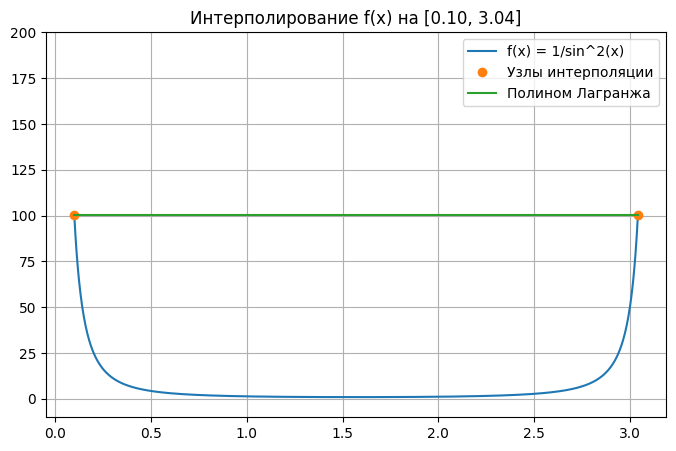

In [4]:
lagrange_interpolate(n=2)

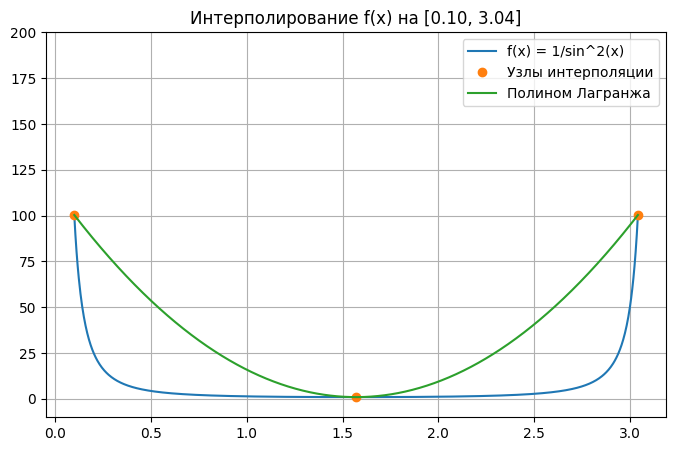

In [5]:
lagrange_interpolate(n=3)

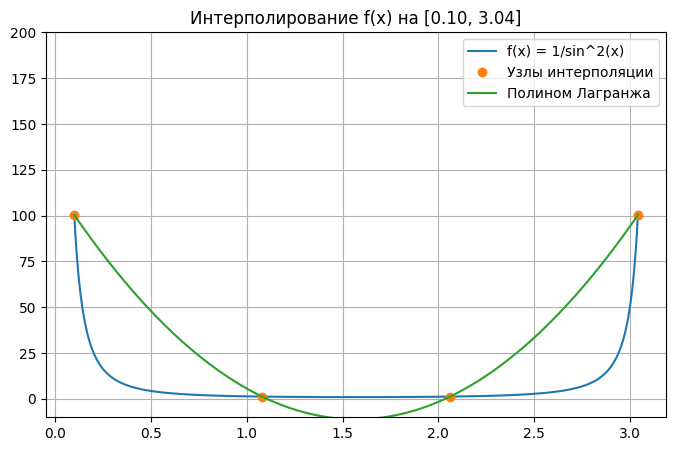

In [6]:
lagrange_interpolate(n=4)

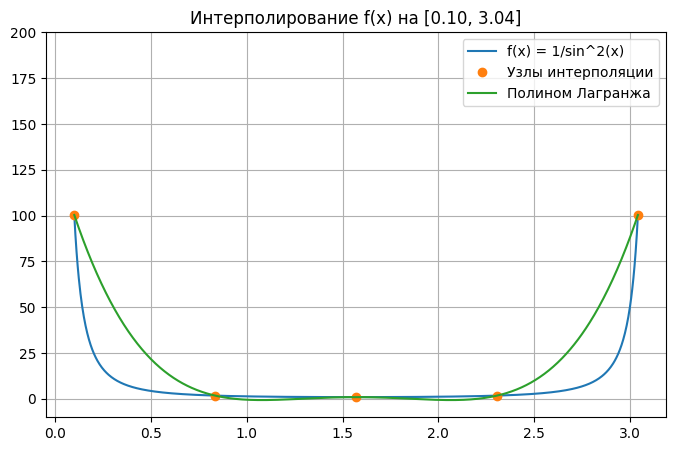

In [7]:
lagrange_interpolate(n=5)

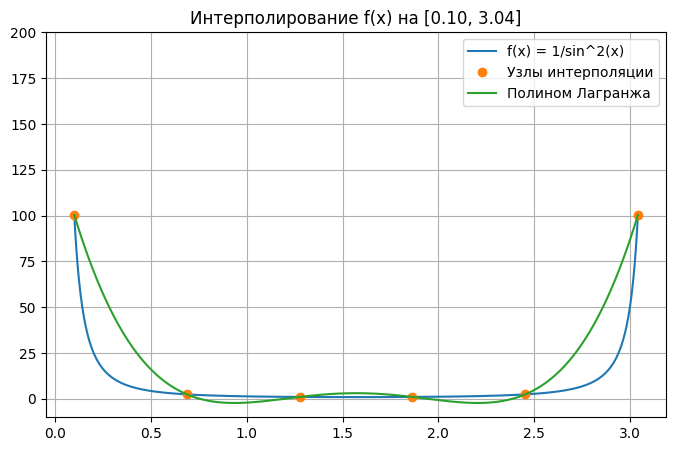

In [8]:
lagrange_interpolate(n=6)

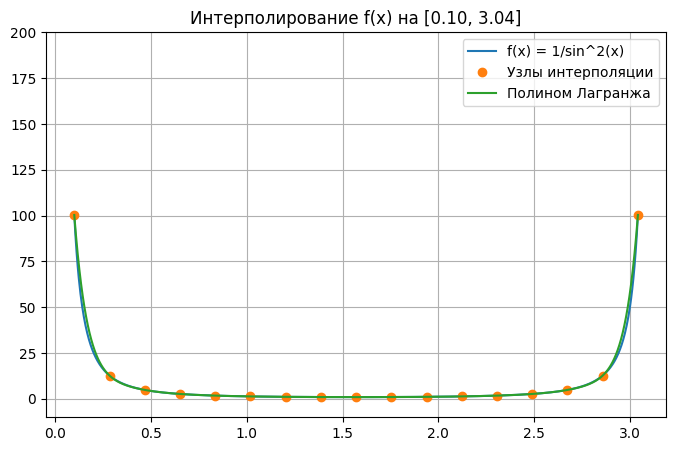

In [9]:
lagrange_interpolate(n=17)

# Паде-аппроксимация

In [13]:
def pade_approx(m: int, n: int, node_count: int) -> None:
    x_nodes = numpy.linspace(a, b, node_count)
    y_nodes = f(x_nodes)

    M = len(x_nodes)
    A = numpy.zeros((M, m + 1 + n))
    b_vec = numpy.zeros(M)

    for k, x_k in enumerate(x_nodes):
        row_p = numpy.array([x_k ** i for i in range(m + 1)])
        row_q = -y_nodes[k] * numpy.array([x_k ** i for i in range(1, n + 1)])

        A[k, :m + 1] = row_p
        A[k, m + 1:] = row_q

        b_vec[k] = y_nodes[k]

    coefficients, *_ = lstsq(A, b_vec, rcond=None)
    p_coefficients = coefficients[:m + 1]
    q_coefficients = numpy.concatenate(([1.0], coefficients[m + 1:]))

    def rational_approx(x):
        xp = numpy.vander(x, m + 1, increasing=True) @ p_coefficients
        xq = numpy.vander(x, n + 1, increasing=True) @ q_coefficients
        return xp / xq
    
    xs = numpy.linspace(a, b, 1000)
    ys = f(xs)
    ys_R = rational_approx(xs)

    pyplot.figure(figsize=(8,5))
    pyplot.plot(xs, ys, label='f(x) = 1/sin^2(x)')
    pyplot.plot(x_nodes, y_nodes, 'o', label='Узлы интерполяции')
    pyplot.plot(xs, ys_R, label='Паде-аппроксимация')
    pyplot.ylim(-10, 200)
    pyplot.legend()
    pyplot.title('Паде-аппроксимация f(x) [%.2f, %.2f]' % (a, b))
    pyplot.grid(True)
    pyplot.show()

## Исследование эффективности Паде-аппроксимации

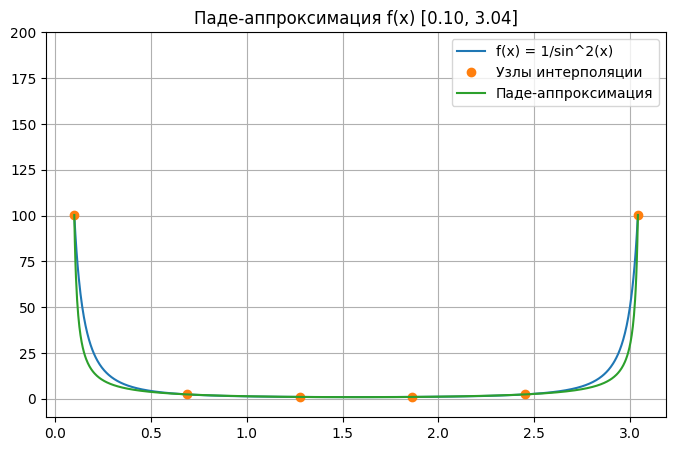

In [15]:
pade_approx(m=4, n=2, node_count=6)